<a href="https://colab.research.google.com/github/pulavartivinay/Face_Mask_Detection/blob/retinaNet/retinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# start
import os
import numpy as np
import cv2 
from retinaface import RetinaFace
from google.colab.patches import cv2_imshow
!pip3 install retinaface 

In [54]:
# loading dataset
!gdown --id 1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp #loading the dataset(zip file) from google drive link to colab
!unzip /content/RMFD.zip &> /dev/null #unzipping our file
!rm -rf /content/RMFD.zip #deleting the zip file
# https://github.com/X-zhangyang/Real-World-Masked-Face-Dataset

Downloading...
From: https://drive.google.com/uc?id=1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp
To: /content/RMFD.zip
583MB [00:03, 236MB/s]Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/gdown/cli.py", line 61, in main
    quiet=args.quiet,

603MB [00:03, 189MB/s]


In [5]:
# pre processing the dataset
# https://keras.io/api/preprocessing/
unmasked_paths = []
masked_paths = []
dataset_path = "/content/self-built-masked-face-recognition-dataset/"
unmasked_face_dataset_path = dataset_path + "AFDB_face_dataset/"
masked_face_dataset_path = dataset_path + "AFDB_masked_face_dataset/"
for (root,dirs,files) in os.walk(unmasked_face_dataset_path): # try to make this part efficient?
  for dir in dirs:
    if(dir!=".ipynb_checkpoints"):
      dir_path = unmasked_face_dataset_path + dir
      for (root, dirs, files) in os.walk(dir_path):
        for file in files:
          image_path = dir_path + '/' + file
          unmasked_paths.append(image_path)
for (root,dirs,files) in os.walk(masked_face_dataset_path):
  for dir in dirs:
    if(dir!=".ipynb_checkpoints"):
      dir_path = masked_face_dataset_path + dir
      for (root, dirs, files) in os.walk(dir_path):
        for file in files:
          image_path = dir_path + '/' + file
          masked_paths.append(image_path)
print(len(masked_paths))
print(len(unmasked_paths))

2203
90468


In [49]:
# building the retinaNet model for Face Detection - retinaFace
# https://pypi.org/project/face-detection/
# https://github.com/elliottzheng/face-detection

def retina_face_detector(mask_path,detector):
  rgb_image = detector.read(mask_path)
  faces = detector.predict(rgb_image)
  print(faces)
  if(len(faces) > 0): 
    return faces

In [50]:
# building the openCV image cropping function
# https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

def openCV_image_cropping(image_path,face):
  img = cv2.imread(image_path)
  crop_img = img[face["y1"]:face["y2"], face["x1"]:face["x2"]]
  return crop_img

model[normal quality] init ..
model success !


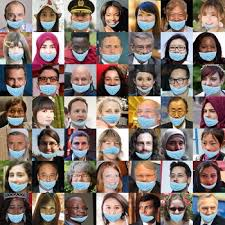

[{'x1': 8, 'y1': 166, 'x2': 27, 'y2': 190, 'left_eye': (11, 175), 'right_eye': (20, 175), 'nose': (14, 180), 'left_lip': (12, 184), 'right_lip': (19, 184)}, {'x1': 38, 'y1': 166, 'x2': 57, 'y2': 188, 'left_eye': (44, 174), 'right_eye': (52, 175), 'nose': (48, 179), 'left_lip': (44, 183), 'right_lip': (51, 183)}, {'x1': 169, 'y1': 167, 'x2': 187, 'y2': 189, 'left_eye': (172, 175), 'right_eye': (180, 175), 'nose': (174, 179), 'left_lip': (172, 184), 'right_lip': (179, 183)}, {'x1': 39, 'y1': 135, 'x2': 57, 'y2': 156, 'left_eye': (44, 143), 'right_eye': (52, 143), 'nose': (48, 148), 'left_lip': (45, 152), 'right_lip': (51, 151)}, {'x1': 102, 'y1': 38, 'x2': 120, 'y2': 61, 'left_eye': (108, 46), 'right_eye': (116, 46), 'nose': (113, 50), 'left_lip': (109, 55), 'right_lip': (115, 55)}, {'x1': 104, 'y1': 7, 'x2': 119, 'y2': 26, 'left_eye': (108, 15), 'right_eye': (116, 15), 'nose': (112, 19), 'left_lip': (109, 22), 'right_lip': (115, 21)}, {'x1': 37, 'y1': 105, 'x2': 53, 'y2': 125, 'left_eye

48


In [52]:
# passing random image from the dataset through retinaNet Face Detection model and visualising the output

detector = RetinaFace(quality='normal')
random_image_path = "/content/sample_image.jpeg"
cv2_imshow(cv2.imread(random_image_path))
Face_Co_Ordinates = retina_face_detector(random_image_path,detector)
count = 0;
print(len(Face_Co_Ordinates))
for face in Face_Co_Ordinates:
  if(face != None):
    cv2_imshow(openCV_image_cropping(random_image_path,face))
    count = count + 1
print(count)

In [ ]:
# passing random image face detection output of retinaNet Face Detection model to openCV image cropping function and visualising the image

In [ ]:
# passing all images from the dataset through retinaNet Face Detection model (no visualisation)

In [ ]:
# passing all images face detection output of retinaNet Face Detection model to openCV image cropping function (no visualisation)